In [25]:
import requests
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import plotly.express as px
plt.style.use('cyberpunk')


In [26]:
references_url1 = "https://raw.githubusercontent.com/trickest/cve/main/references.txt"
response = requests.get(url=references_url1)
data = response.text
array = np.genfromtxt(data.splitlines(), delimiter=' - ', dtype=None,encoding=None)
df = pd.DataFrame(array)
df.columns = ["CVE_ID", "URL"]

In [27]:
references_url2 = "https://raw.githubusercontent.com/trickest/cve/main/github.txt"
response = requests.get(url=references_url2)
github = response.text
array = np.genfromtxt(github.splitlines(), delimiter=' - ', dtype=None, encoding=None)
df1 = pd.DataFrame(array)
df1.columns = ["CVE_ID", "URL"]

In [28]:
df_all_rows = pd.concat([df, df1], ignore_index=True)
df_all_rows.to_csv('github_references.csv', index=False)

In [29]:
df = pd.read_csv('github_references.csv')

In [30]:
df

,CVE_ID,URL
0,CVE-1999-0095,http://seclists.org/fulldisclosure/2019/Jun/16
1,CVE-1999-0145,http://seclists.org/fulldisclosure/2019/Jun/16
2,CVE-1999-0225,http://www.nai.com/nai_labs/asp_set/advisory/2...
3,CVE-1999-0247,http://www.nai.com/nai_labs/asp_set/advisory/1...
4,CVE-1999-0298,http://www.nai.com/nai_labs/asp_set/advisory/0...
...,...,...
121221,CVE-2121-44228,https://github.com/nomi-sec/PoC-in-GitHub
121222,CVE-2190-17026,https://github.com/ARPSyndicate/cvemon
121223,CVE-2190-17026,https://github.com/maxpl0it/CVE-2019-17026-Exp...
121224,CVE-3005-0001,https://github.com/ARPSyndicate/cvemon


In [31]:
group = df.groupby('CVE_ID')['URL'].unique()
df = pd.DataFrame(data=group)
df = df.reset_index()
df = pd.DataFrame(df)
df[["cve", "YEAR", 'id']] = df["CVE_ID"].str.split("-", expand = True)
df = df.drop(['cve','id'],axis=1)

In [32]:
df['YEAR'] = df['YEAR'].astype('int64')

df = df.drop(df[df['YEAR'] > 2022].index)
df = df.drop(df[df['YEAR'] == 0].index)

In [33]:
df

,CVE_ID,URL,YEAR
1,CVE-1999-0001,[https://github.com/flowground/anchore-io-conn...,1999
2,CVE-1999-0002,"[https://github.com/jimmyislive/gocve, https:/...",1999
3,CVE-1999-0003,[https://github.com/jimmyislive/gocve],1999
4,CVE-1999-0004,[https://github.com/jimmyislive/gocve],1999
5,CVE-1999-0005,[https://github.com/jimmyislive/gocve],1999
...,...,...,...
59568,CVE-2022-5561,[https://github.com/nomi-sec/PoC-in-GitHub],2022
59569,CVE-2022-6099,"[https://github.com/ARPSyndicate/cvemon, https...",2022
59570,CVE-2022-8475,[https://github.com/nomi-sec/PoC-in-GitHub],2022
59571,CVE-2022-8515,"[https://github.com/ARPSyndicate/cvemon, https...",2022


In [34]:
def calculated(x):
    return len(x)

df['COUNT']=df['URL'].apply(calculated)

df['COUNT'] = df['COUNT'].astype('int64')

df = df.sort_values(by=['COUNT'],ascending=False).head(10)
df

,CVE_ID,URL,YEAR,COUNT
39324,CVE-2019-11358,[http://packetstormsecurity.com/files/152787/d...,2019,1435
56200,CVE-2021-44228,[http://packetstormsecurity.com/files/165225/A...,2021,417
18250,CVE-2014-6271,[http://packetstormsecurity.com/files/128517/V...,2014,395
16243,CVE-2014-0160,[http://seclists.org/fulldisclosure/2014/Apr/1...,2014,372
38748,CVE-2019-0708,[http://packetstormsecurity.com/files/153133/M...,2019,270
44280,CVE-2020-0796,[http://packetstormsecurity.com/files/156731/C...,2020,189
25113,CVE-2016-5195,[http://packetstormsecurity.com/files/139277/K...,2016,176
57769,CVE-2022-22965,[http://packetstormsecurity.com/files/166713/S...,2022,173
30893,CVE-2017-5638,[http://blog.talosintelligence.com/2017/03/apa...,2017,157
53663,CVE-2021-3156,[http://packetstormsecurity.com/files/161160/S...,2021,150


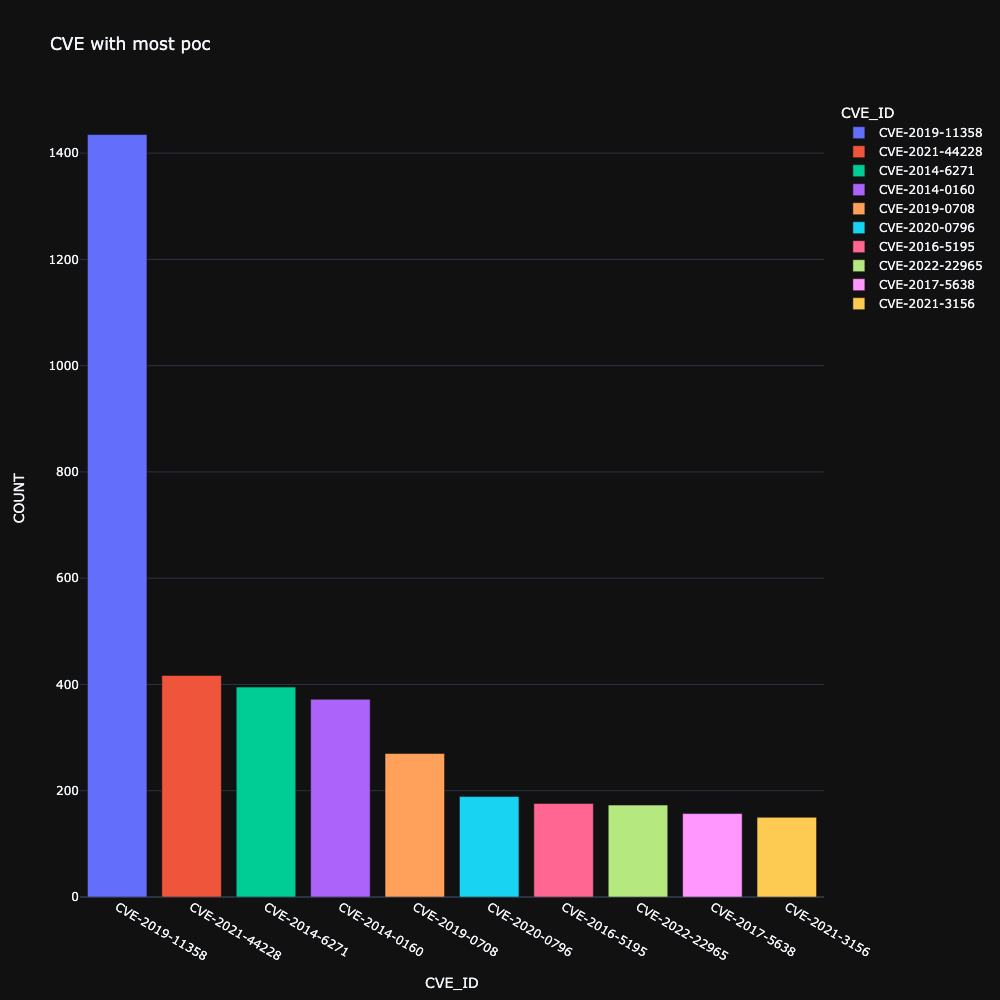

In [35]:
fig =px.bar(df, x = "CVE_ID", y = "COUNT",color="CVE_ID", title = "CVE with most poc", width=1000, height=1000)

fig.update_yaxes(range=[0, 1500], row=1, col=1)

fig.show("png")

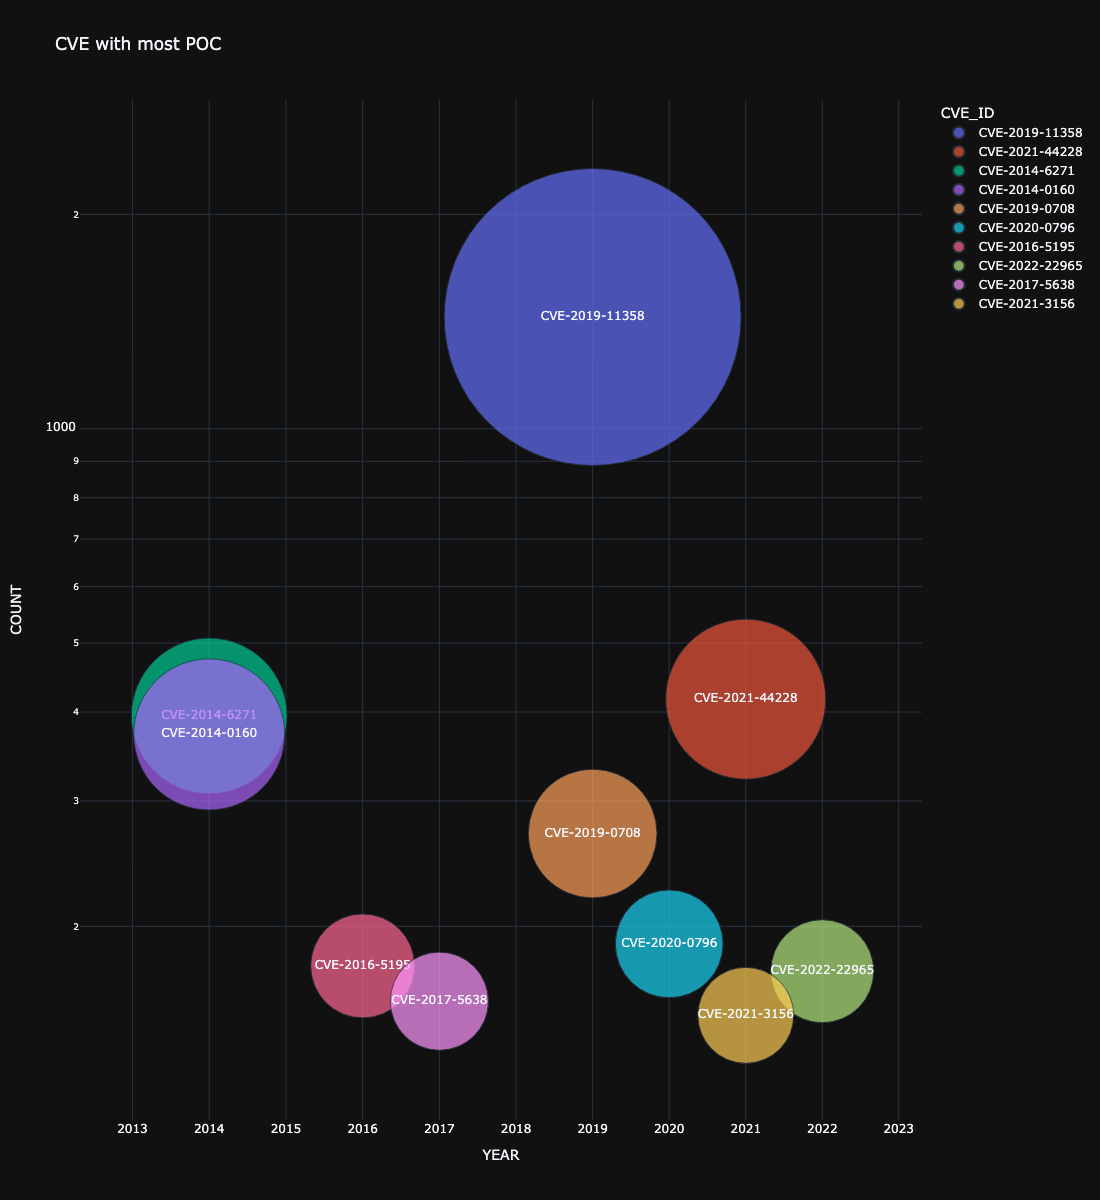

In [36]:
fig = px.scatter(
    df, x="YEAR", y='COUNT', title='CVE with most POC', size='COUNT',color="CVE_ID", hover_name="CVE_ID", text='CVE_ID', log_x=True, log_y=True, size_max=210, width=1100, height=1200)

fig.show("png")